<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Classification_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html" target="_blank"> Click Here</a>** 

2. Documentation on Pycaret-Classification: **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html" target="_blank"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.4'

---
# **1. Classification: Basics**
---
### **1.1 Get the list of datasets available in pycaret (Total Datasets = 55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "diabetes" dataset (Step-I)**
---

In [4]:
diabetesDataSet = get_data("diabetes")    # SN is 7

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **1.3 Parameter setting for all models (Step-II)**
---

In [5]:
from pycaret.classification import *
s = setup(data=diabetesDataSet, target='Class variable', silent=True)

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,session_id,8326
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


---
### **1.4 Run all models (Step-III)**
---

In [6]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7674,0.8219,0.5721,0.7261,0.6353,0.4694,0.4793,0.364
ridge,Ridge Classifier,0.7636,0.0000,0.5568,0.7221,0.6250,0.4580,0.4681,0.010
rf,Random Forest Classifier,0.7599,0.8094,0.5813,0.7068,0.6304,0.4569,0.4658,0.448
lda,Linear Discriminant Analysis,0.7598,0.8167,0.5518,0.7147,0.6188,0.4494,0.4593,0.013
gbc,Gradient Boosting Classifier,0.7597,0.8193,0.6176,0.6840,0.6464,0.4657,0.4691,0.094
ada,Ada Boost Classifier,0.7520,0.7943,0.5761,0.6851,0.6217,0.4406,0.4468,0.078
et,Extra Trees Classifier,0.7468,0.8018,0.5674,0.6802,0.6130,0.4289,0.4357,0.449
lightgbm,Light Gradient Boosting Machine,0.7298,0.8051,0.5863,0.6395,0.6043,0.4015,0.4075,0.062
knn,K Neighbors Classifier,0.7095,0.7374,0.5553,0.6075,0.5770,0.3571,0.3599,0.115
dt,Decision Tree Classifier,0.7002,0.6791,0.6032,0.5852,0.5930,0.3561,0.3569,0.013


---
### **1.5 "Three line of code" for model comparison for "Diabetes" dataset**
---



In [7]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
setup(data=diabetesDataSet, target='Class variable', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7523,0.8152,0.5558,0.6657,0.6008,0.4262,0.4317,0.174
ridge,Ridge Classifier,0.7431,0.0000,0.5295,0.6568,0.5822,0.4023,0.4086,0.011
gbc,Gradient Boosting Classifier,0.7430,0.8038,0.5775,0.6456,0.6051,0.4171,0.4211,0.094
lda,Linear Discriminant Analysis,0.7412,0.8072,0.5348,0.6497,0.5826,0.4001,0.4055,0.012
rf,Random Forest Classifier,0.7319,0.8039,0.5181,0.6430,0.5669,0.3785,0.3867,0.449
ada,Ada Boost Classifier,0.7282,0.7843,0.5614,0.6237,0.5865,0.3861,0.3899,0.079
et,Extra Trees Classifier,0.7282,0.7762,0.5023,0.6420,0.5587,0.3681,0.3763,0.448
knn,K Neighbors Classifier,0.7076,0.7354,0.5333,0.5961,0.5555,0.3402,0.3462,0.114
lightgbm,Light Gradient Boosting Machine,0.7076,0.7848,0.5500,0.5888,0.5625,0.3450,0.3492,0.036
nb,Naive Bayes,0.6781,0.7083,0.3114,0.5873,0.4007,0.2080,0.2314,0.011


---
### **1.6 "Three line of code" for model comparison for "Cancer" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.classification import *

cancerDataSet = get_data("cancer")
setup(data = cancerDataSet, target='Class', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9747,0.9946,0.9738,0.9518,0.9618,0.9430,0.9440,0.451
lr,Logistic Regression,0.9727,0.9939,0.9679,0.9525,0.9586,0.9383,0.9400,0.018
et,Extra Trees Classifier,0.9727,0.9947,0.9675,0.9518,0.9586,0.9382,0.9393,0.407
nb,Naive Bayes,0.9664,0.9808,0.9550,0.9465,0.9489,0.9239,0.9259,0.013
svm,SVM - Linear Kernel,0.9664,0.0000,0.9488,0.9518,0.9475,0.9230,0.9256,0.014
gbc,Gradient Boosting Classifier,0.9663,0.9936,0.9542,0.9445,0.9480,0.9231,0.9245,0.088
ridge,Ridge Classifier,0.9644,0.0000,0.9296,0.9638,0.9439,0.9179,0.9207,0.012
knn,K Neighbors Classifier,0.9621,0.9845,0.9221,0.9599,0.9401,0.9124,0.9133,0.117
lightgbm,Light Gradient Boosting Machine,0.9579,0.9929,0.9288,0.9430,0.9343,0.9034,0.9050,0.035
ada,Ada Boost Classifier,0.9561,0.9918,0.9354,0.9324,0.9321,0.8996,0.9016,0.079


---
# **2. Classification: working with user dataset**
---
### **2.1 Download the "diabetes" dataset to local system** 
---


In [9]:
diabetesDataSet.to_csv("diabetesDataSet.csv", index=False)

from google.colab import files
files.download('diabetesDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **2.2 Uploading "user file" from user system**
---

In [ ]:
from google.colab import files
files.upload()

---
### **2.3 "Read" the uploaded file**
---

In [ ]:
import pandas as pd
myDataSet = pd.read_csv('diabetesDataSet (1).csv')
myDataSet.head()

---
### **2.4 "Compare" the model performance**
---

In [ ]:
from pycaret.classification import *

setup(data = myDataSet, target='Class variable', silent=True)
cm = compare_models()

---
### **2.5 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [ ]:
from pycaret.classification import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")
#s = setup(data = myDataSet, target='cancer', silent=True)
#cm = compare_models()

---
# **3. Classification: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [10]:
setup(data=diabetesDataSet, target='Class variable', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7765,0.8351,0.6061,0.7094,0.6474,0.4863,0.4937,0.092
lr,Logistic Regression,0.7710,0.8268,0.5681,0.7152,0.6301,0.4671,0.4760,0.018
ada,Ada Boost Classifier,0.7635,0.7873,0.5953,0.6795,0.6312,0.4588,0.4633,0.078
ridge,Ridge Classifier,0.7616,0.0000,0.5363,0.7029,0.6063,0.4397,0.4495,0.011
lda,Linear Discriminant Analysis,0.7615,0.8180,0.5523,0.6910,0.6129,0.4436,0.4502,0.013
et,Extra Trees Classifier,0.7580,0.8070,0.5301,0.6955,0.5950,0.4285,0.4406,0.441
rf,Random Forest Classifier,0.7543,0.8157,0.5518,0.6794,0.6048,0.4296,0.4373,0.449
knn,K Neighbors Classifier,0.7374,0.7497,0.5520,0.6317,0.5857,0.3960,0.3997,0.116
lightgbm,Light Gradient Boosting Machine,0.7263,0.7892,0.5579,0.6156,0.5809,0.3794,0.3832,0.037
svm,SVM - Linear Kernel,0.7189,0.0000,0.4705,0.6379,0.5255,0.3365,0.3526,0.013


---
### **3.2 Model performance using "Feature Selection"**
---

In [11]:
setup(data=diabetesDataSet, target='Class variable', feature_selection = True, feature_selection_method = 'classic', feature_selection_threshold = 0.2, silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7690,0.8175,0.5681,0.7122,0.6293,0.4654,0.4733,0.011
lr,Logistic Regression,0.7671,0.8163,0.5681,0.7093,0.6284,0.4624,0.4701,0.208
ridge,Ridge Classifier,0.7652,0.0000,0.5573,0.7101,0.6213,0.4555,0.4646,0.011
nb,Naive Bayes,0.7635,0.8011,0.6693,0.6678,0.6630,0.4819,0.4866,0.011
qda,Quadratic Discriminant Analysis,0.7486,0.7866,0.6167,0.6482,0.6297,0.4401,0.4421,0.012
et,Extra Trees Classifier,0.7485,0.7982,0.5421,0.6846,0.5992,0.4205,0.4306,0.434
rf,Random Forest Classifier,0.7466,0.7949,0.5684,0.6695,0.6089,0.4243,0.4317,0.449
gbc,Gradient Boosting Classifier,0.7465,0.8123,0.6003,0.6527,0.6191,0.4311,0.4367,0.083
ada,Ada Boost Classifier,0.7448,0.7940,0.5842,0.6644,0.6106,0.4252,0.4354,0.076
lightgbm,Light Gradient Boosting Machine,0.7410,0.7814,0.5842,0.6497,0.6101,0.4180,0.4231,0.058


---
### **3.3 Model performance using "Outlier Removal"**
---

In [12]:
setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7725,0.8032,0.4768,0.7358,0.5680,0.4257,0.4498,0.451
lr,Logistic Regression,0.7627,0.8159,0.5000,0.6898,0.5722,0.4149,0.4300,0.142
ridge,Ridge Classifier,0.7588,0.0000,0.4757,0.6873,0.5535,0.3978,0.4153,0.010
lda,Linear Discriminant Analysis,0.7529,0.8101,0.4820,0.6664,0.5517,0.3891,0.4032,0.013
rf,Random Forest Classifier,0.7510,0.8094,0.4816,0.6634,0.5472,0.3841,0.3991,0.451
lightgbm,Light Gradient Boosting Machine,0.7471,0.7872,0.5676,0.6185,0.5877,0.4069,0.4106,0.035
gbc,Gradient Boosting Classifier,0.7431,0.7946,0.5188,0.6238,0.5619,0.3838,0.3897,0.090
knn,K Neighbors Classifier,0.7275,0.7374,0.5066,0.6040,0.5371,0.3501,0.3611,0.116
ada,Ada Boost Classifier,0.7118,0.7598,0.5004,0.5558,0.5208,0.3180,0.3218,0.079
nb,Naive Bayes,0.7098,0.7355,0.4820,0.5632,0.5141,0.3107,0.3159,0.011


---
### **3.4 Model performance using "Transformation"**
---

In [16]:
setup(data=diabetesDataSet, target='Class variable', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7709,0.8232,0.5897,0.7252,0.6429,0.4788,0.4902,0.018
lda,Linear Discriminant Analysis,0.7690,0.8171,0.5953,0.7177,0.6448,0.4774,0.4864,0.013
ridge,Ridge Classifier,0.7671,0.0000,0.5953,0.7140,0.6433,0.4739,0.4828,0.011
ada,Ada Boost Classifier,0.7393,0.8000,0.6213,0.6471,0.6300,0.4299,0.4331,0.079
gbc,Gradient Boosting Classifier,0.7355,0.7875,0.5805,0.6547,0.6081,0.4115,0.4177,0.088
rf,Random Forest Classifier,0.7262,0.7890,0.5126,0.6608,0.5724,0.3765,0.3863,0.451
et,Extra Trees Classifier,0.7170,0.7658,0.4713,0.6584,0.5447,0.3474,0.3608,0.449
svm,SVM - Linear Kernel,0.7169,0.0000,0.5471,0.6490,0.5659,0.3652,0.3845,0.013
knn,K Neighbors Classifier,0.7151,0.7268,0.4971,0.6492,0.5553,0.3518,0.3640,0.114
lightgbm,Light Gradient Boosting Machine,0.7132,0.7866,0.5742,0.6055,0.5835,0.3667,0.3711,0.037


---
### **3.5 Model performance using "PCA"**
---

In [17]:
setup(data=diabetesDataSet, target='Class variable', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7132,0.7535,0.4463,0.6776,0.5283,0.3379,0.3581,0.012
lda,Linear Discriminant Analysis,0.7113,0.7721,0.4616,0.6743,0.5357,0.3399,0.3598,0.012
lr,Logistic Regression,0.7094,0.7727,0.4616,0.6675,0.5339,0.3363,0.3550,0.016
ridge,Ridge Classifier,0.7094,0.0000,0.4566,0.6725,0.5310,0.3349,0.3553,0.011
nb,Naive Bayes,0.7037,0.7578,0.4561,0.6595,0.5284,0.3248,0.3431,0.012
ada,Ada Boost Classifier,0.6963,0.7262,0.5116,0.6133,0.5500,0.3265,0.3340,0.077
gbc,Gradient Boosting Classifier,0.6796,0.7267,0.4868,0.5905,0.5211,0.2875,0.2979,0.079
rf,Random Forest Classifier,0.6646,0.7238,0.4958,0.5545,0.5149,0.2636,0.2686,0.458
et,Extra Trees Classifier,0.6554,0.7195,0.4658,0.5372,0.4923,0.2370,0.2412,0.441
lightgbm,Light Gradient Boosting Machine,0.6516,0.7209,0.4761,0.5430,0.4962,0.2354,0.2425,0.036


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [18]:
setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7647,0.8326,0.5797,0.6846,0.6217,0.4537,0.4612,0.089
lr,Logistic Regression,0.7549,0.8258,0.5098,0.6770,0.5758,0.4110,0.4218,0.019
lightgbm,Light Gradient Boosting Machine,0.7549,0.8032,0.5977,0.6516,0.6200,0.4404,0.4439,0.038
ada,Ada Boost Classifier,0.7529,0.8079,0.5735,0.6549,0.6063,0.4286,0.4339,0.079
lda,Linear Discriminant Analysis,0.7529,0.8239,0.5039,0.6744,0.5696,0.4048,0.4163,0.012
ridge,Ridge Classifier,0.7510,0.0000,0.4980,0.6731,0.5653,0.3994,0.4115,0.011
rf,Random Forest Classifier,0.7471,0.8260,0.5330,0.6464,0.5803,0.4034,0.4094,0.451
et,Extra Trees Classifier,0.7471,0.8047,0.5101,0.6537,0.5680,0.3961,0.4040,0.449
knn,K Neighbors Classifier,0.7176,0.7378,0.4624,0.6017,0.5136,0.3241,0.3326,0.112
nb,Naive Bayes,0.6980,0.7614,0.2170,0.7014,0.3080,0.1859,0.2451,0.013


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [19]:
setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore', 
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7784,0.0000,0.5283,0.7171,0.6037,0.4573,0.4695,0.012
lr,Logistic Regression,0.7725,0.8277,0.5471,0.6928,0.6025,0.4501,0.4605,0.018
gbc,Gradient Boosting Classifier,0.7706,0.8146,0.5765,0.6875,0.6211,0.4597,0.4678,0.090
lda,Linear Discriminant Analysis,0.7706,0.8254,0.5283,0.6955,0.5954,0.4420,0.4524,0.013
rf,Random Forest Classifier,0.7647,0.8167,0.5643,0.6723,0.6075,0.4434,0.4501,0.451
knn,K Neighbors Classifier,0.7588,0.7790,0.5279,0.6671,0.5870,0.4208,0.4279,0.114
ada,Ada Boost Classifier,0.7529,0.8043,0.5460,0.6511,0.5897,0.4160,0.4220,0.076
et,Extra Trees Classifier,0.7510,0.8077,0.4919,0.6616,0.5616,0.3940,0.4037,0.447
lightgbm,Light Gradient Boosting Machine,0.7451,0.7872,0.5702,0.6273,0.5916,0.4088,0.4135,0.037
svm,SVM - Linear Kernel,0.7373,0.0000,0.6176,0.6053,0.6011,0.4076,0.4156,0.013


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.3**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html" target="_blank"> Click Here</a>** for more

---
# **4. Classification: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [20]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
setup(data=diabetesDataSet, target='Class variable', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8534,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.8519,0.9444,0.5789,1.0000,0.7333,0.6406,0.6865
2,0.7778,0.8279,0.5556,0.7143,0.6250,0.4706,0.4781
3,0.7593,0.8503,0.7778,0.6087,0.6829,0.4935,0.5031
4,0.5741,0.6474,0.3889,0.3684,0.3784,0.0548,0.0548
5,0.6852,0.7539,0.3889,0.5385,0.4516,0.2388,0.2450
6,0.8148,0.8480,0.6111,0.7857,0.6875,0.5588,0.5677
7,0.8113,0.8095,0.5000,0.9000,0.6429,0.5285,0.5706
8,0.8491,0.8619,0.7222,0.8125,0.7647,0.6542,0.6566
9,0.8491,0.8143,0.6667,0.8571,0.7500,0.6443,0.6547


---
### **4.2 Other available classification models**
---
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.create_model" target="_blank"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [21]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on "new unseen dataset"**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,0,0.50
1,1,85,66,29,0,26.6,0.351,31,0,0,0.94
2,8,183,64,0,0,23.3,0.672,32,1,1,0.86
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.92
5,5,116,74,0,0,25.6,0.201,30,0,0,0.90
6,3,78,50,32,88,31.0,0.248,26,1,1,0.74
7,10,115,0,0,0,35.3,0.134,29,0,0,0.50
8,2,197,70,45,543,30.5,0.158,53,1,1,0.88
9,8,125,96,0,0,0.0,0.232,54,1,1,0.63


---
### **4.5 "Save" and "Download" the prediction result**
---

In [ ]:
newPredictions.to_csv("NewPredictions.csv", index=False)

from google.colab import files
files.download('NewPredictions.csv')

---
### **4.6 "Save" the trained model** 
---

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

---
### **4.7 Download the "trained model file" to user local system** 
---

In [ ]:
from google.colab import files
files.download('rfModelFile.pkl')

---
### **4.8  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.8.1 Upload the  "Trained Model"**


In [ ]:
from google.colab import files
files.upload()

---
### **4.8.2 Load the "Model"**
---

In [ ]:
rfModel = load_model('rfModelFile (1)')

---
### **4.8.3 Make the prediction on "new unseen dataset"**
---

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**
*   Area Under the Curve         - 'auc'
*   Discrimination Threshold     - 'threshold'
*   Precision Recall Curve       - 'pr'
*   Confusion Matrix             - 'confusion_matrix'
*   Class Prediction Error       - 'error'
*   Classification Report        - 'class_report'
*   Decision Boundary            - 'boundary'
*   Recursive Feat. Selection    - 'rfe'
*   Learning Curve               - 'learning'
*   Manifold Learning            - 'manifold'
*   Calibration Curve            - 'calibration'
*   Validation Curve             - 'vc'
*   Dimension Learning           - 'dimension'
*   Feature Importance           - 'feature'
*   Model Hyperparameter         - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [23]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8534,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.8519,0.9444,0.5789,1.0000,0.7333,0.6406,0.6865
2,0.7778,0.8279,0.5556,0.7143,0.6250,0.4706,0.4781
3,0.7593,0.8503,0.7778,0.6087,0.6829,0.4935,0.5031
4,0.5741,0.6474,0.3889,0.3684,0.3784,0.0548,0.0548
5,0.6852,0.7539,0.3889,0.5385,0.4516,0.2388,0.2450
6,0.8148,0.8480,0.6111,0.7857,0.6875,0.5588,0.5677
7,0.8113,0.8095,0.5000,0.9000,0.6429,0.5285,0.5706
8,0.8491,0.8619,0.7222,0.8125,0.7647,0.6542,0.6566
9,0.8491,0.8143,0.6667,0.8571,0.7500,0.6443,0.6547


---
### **5.2 Create "Confusion Matrix"**
---

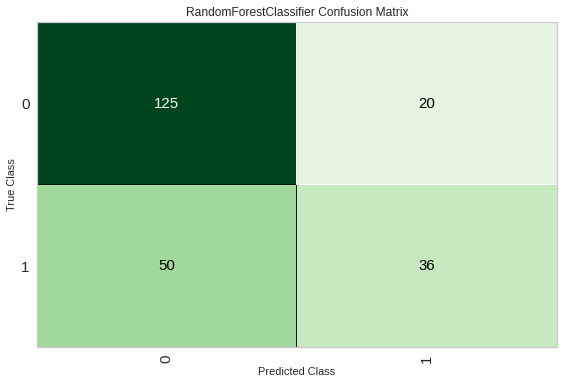

In [24]:
plot_model(rfModel, plot='confusion_matrix')

---
### **5.3 Plot the "learning curve"**
---

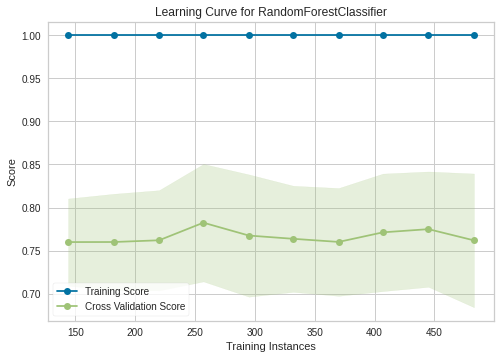

In [25]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "AUC Curve" (Area Under the Curve)**
---

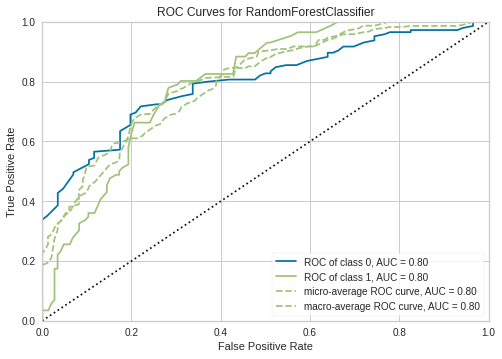

In [26]:
plot_model(rfModel, plot='auc')

---
### **5.5 Plot the "Decision Boundary"**
---

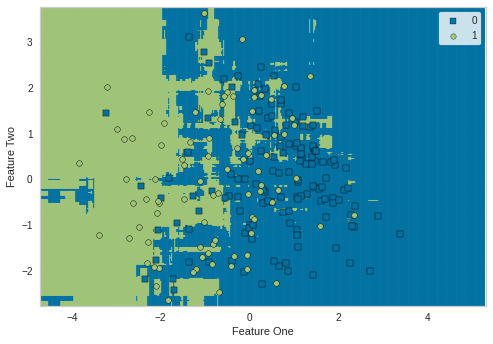

In [27]:
plot_model(rfModel, plot='boundary')

---
### **5.6 Get the model "parameters"**
---

In [28]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


---
### **5.7 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model" target="_blank"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


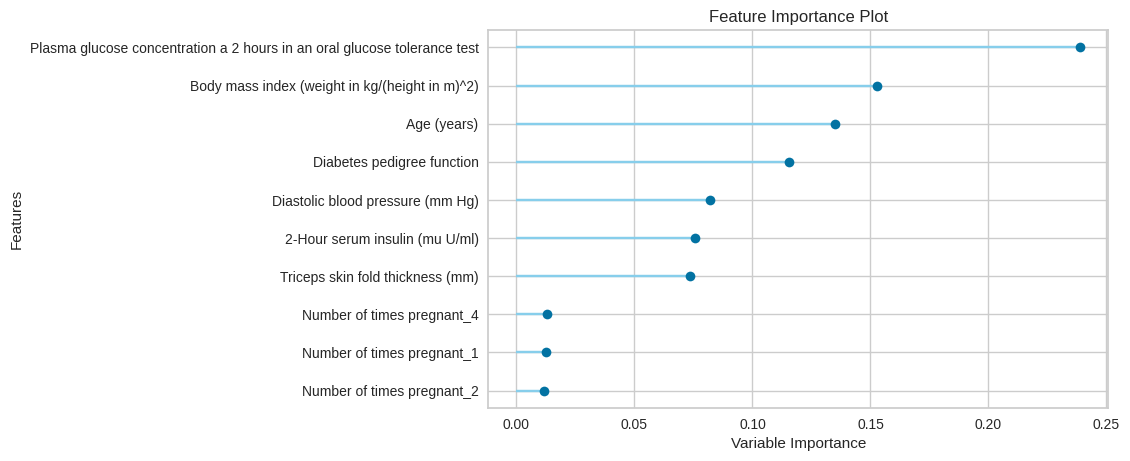

In [29]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

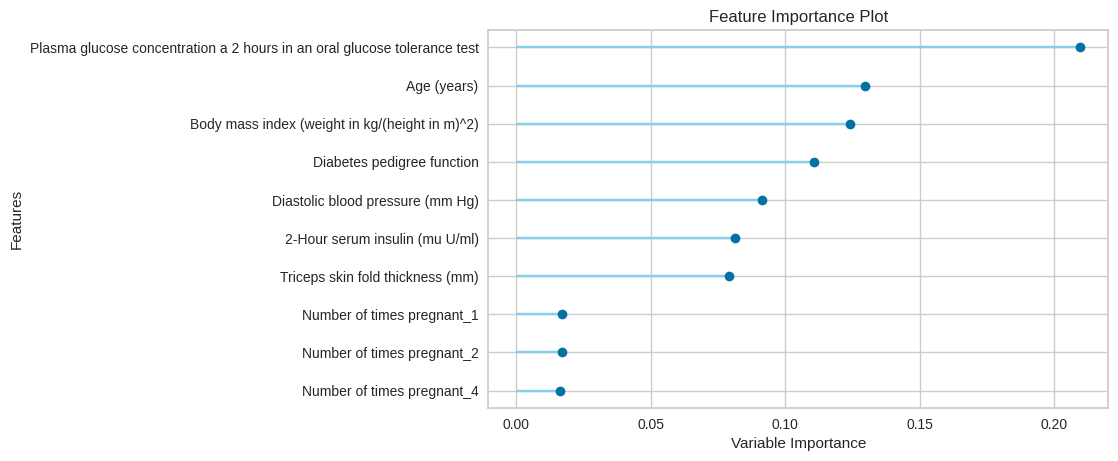

In [30]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

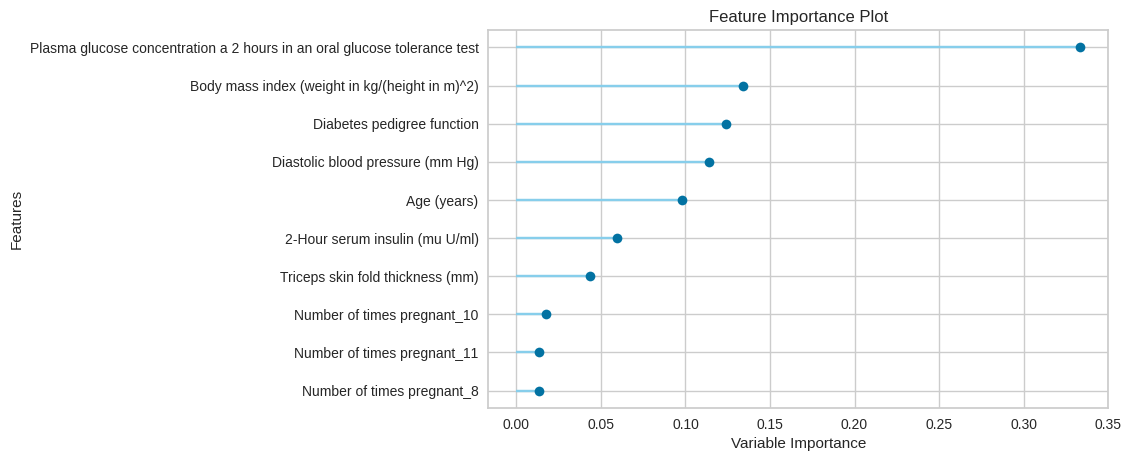

In [31]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [32]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.7113,0.7368,0.5600,0.6364,0.3941,0.4047
1,0.7593,0.7662,0.7895,0.6250,0.6977,0.5021,0.5116
2,0.6852,0.6389,0.5000,0.5294,0.5143,0.2817,0.2819
3,0.7037,0.6944,0.6667,0.5455,0.6000,0.3684,0.3731
4,0.6481,0.5972,0.4444,0.4706,0.4571,0.1972,0.1974
5,0.5926,0.5556,0.4444,0.4000,0.4211,0.1081,0.1085
6,0.7037,0.7222,0.7778,0.5385,0.6364,0.4000,0.4193
7,0.6604,0.5944,0.3889,0.5000,0.4375,0.1997,0.2029
8,0.7170,0.7048,0.6667,0.5714,0.6154,0.3936,0.3965
9,0.6981,0.6500,0.5000,0.5625,0.5294,0.3083,0.3095


#### **Get the "parameters" of Decision Tree**

In [33]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


---
### **7.2 Tune "Decision Tree" model**
---

In [34]:
dtModelTuned = tune_model(dtModel, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7407,0.7248,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.7778,0.8165,0.4737,0.8182,0.6000,0.4609,0.4939
2,0.8333,0.8117,0.7222,0.7647,0.7429,0.6197,0.6203
3,0.7963,0.8156,0.7778,0.6667,0.7179,0.5600,0.5641
4,0.5741,0.5062,0.3889,0.3684,0.3784,0.0548,0.0548
5,0.6481,0.6157,0.3889,0.4667,0.4242,0.1739,0.1754
6,0.6667,0.6019,0.4444,0.5000,0.4706,0.2286,0.2294
7,0.7358,0.7198,0.4444,0.6667,0.5333,0.3592,0.3736
8,0.7925,0.8016,0.6667,0.7059,0.6857,0.5310,0.5315
9,0.7547,0.6786,0.4444,0.7273,0.5517,0.3961,0.4189


#### **Get the "tuned parameters" of Decision Tree**

In [35]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,10
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0.0001
min_impurity_split,None
min_samples_leaf,2
min_samples_split,7


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model" target="_blank"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.automl" target="_blank">Click Here</a>**


---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.deploy_model" target="_blank">Click Here</a>**